# Preprocessing

In [93]:
import pickle
import matplotlib.pyplot as plt
from os.path import join
import numpy as np

short2long = {'ALG': 'Algorithm', 'APP': 'Application', 'CB': 'Class', 'CLA': 'Code_Block', 'DEV': 'Data_Structure', 'DS': 'Data_Type', 'DT': 'Device', 'FN': 'File_Name', 'FT': 'File_Type', 'FUN': 'Function', 'HXT': 'HTML_XML_Tag', 'LAN': 'Language', 'LIB': 'Library', 'OS': 'Operating_System', 'UIE': 'User_Interface_Element', 'UN': 'User_Name', 'VAL': 'Value', 'VAR': 'Variable', 'VER': 'Version', 'WEB': 'Website'}
labels_short = ['ALG', 'APP', 'CB', 'CLA', 'DEV', 'DS', 'DT', 'FN', 'FT', 'FUN', 'HXT', 'LAN', 'LIB', 'OS', 'UIE', 'UN', 'VAL', 'VAR', 'VER', 'WEB']
label2id = {'O': 0, 'B-ALG': 1, 'I-ALG': 2, 'B-APP': 3, 'I-APP': 4, 'B-CB': 5, 'I-CB': 6, 'B-CLA': 7, 'I-CLA': 8, 'B-DEV': 9, 'I-DEV': 10, 'B-DS': 11, 'I-DS': 12, 'B-DT': 13, 'I-DT': 14, 'B-FN': 15, 'I-FN': 16, 'B-FT': 17, 'I-FT': 18, 'B-FUN': 19, 'I-FUN': 20, 'B-HXT': 21, 'I-HXT': 22, 'B-LAN': 23, 'I-LAN': 24, 'B-LIB': 25, 'I-LIB': 26, 'B-OS': 27, 'I-OS': 28, 'B-UIE': 29, 'I-UIE': 30, 'B-UN': 31, 'I-UN': 32, 'B-VAL': 33, 'I-VAL': 34, 'B-VAR': 35, 'I-VAR': 36, 'B-VER': 37, 'I-VER': 38, 'B-WEB': 39, 'I-WEB': 40}

path = "../pickles"
path_save_image = "../figs/"


In [18]:
def open_pickle(path, name):
    with open(join(path, name), 'rb') as f:
        return pickle.load(f)

model_llama = "LLaMA 2"
llama_validation = open_pickle(path, "llama_validation.pickle")
llama_test = open_pickle(path, "llama_test.pickle")
llama_gh = open_pickle(path, "llama_gh.pickle")

model_unllama = "un-LLaMA"
unllama_validation = open_pickle(path, "unllama_validation.pickle")
unllama_test = open_pickle(path, "unllama_test.pickle")
unllama_gh = open_pickle(path, "unllama_gh.pickle")

model_codellama = "CodeLLaMA"
codellama_validation = open_pickle(path, "codellama_validation.pickle")
codellama_test = open_pickle(path, "codellama_test.pickle")
codellama_gh = open_pickle(path, "codellama_gh.pickle")

model_uncodellama = "un-CodeLLaMA"
uncodellama_validation = open_pickle(path, "uncodellama_validation.pickle")
uncodellama_test = open_pickle(path, "uncodellama_test.pickle")
uncodellama_gh = open_pickle(path, "uncodellama_gh.pickle")

# Results

## Validation set

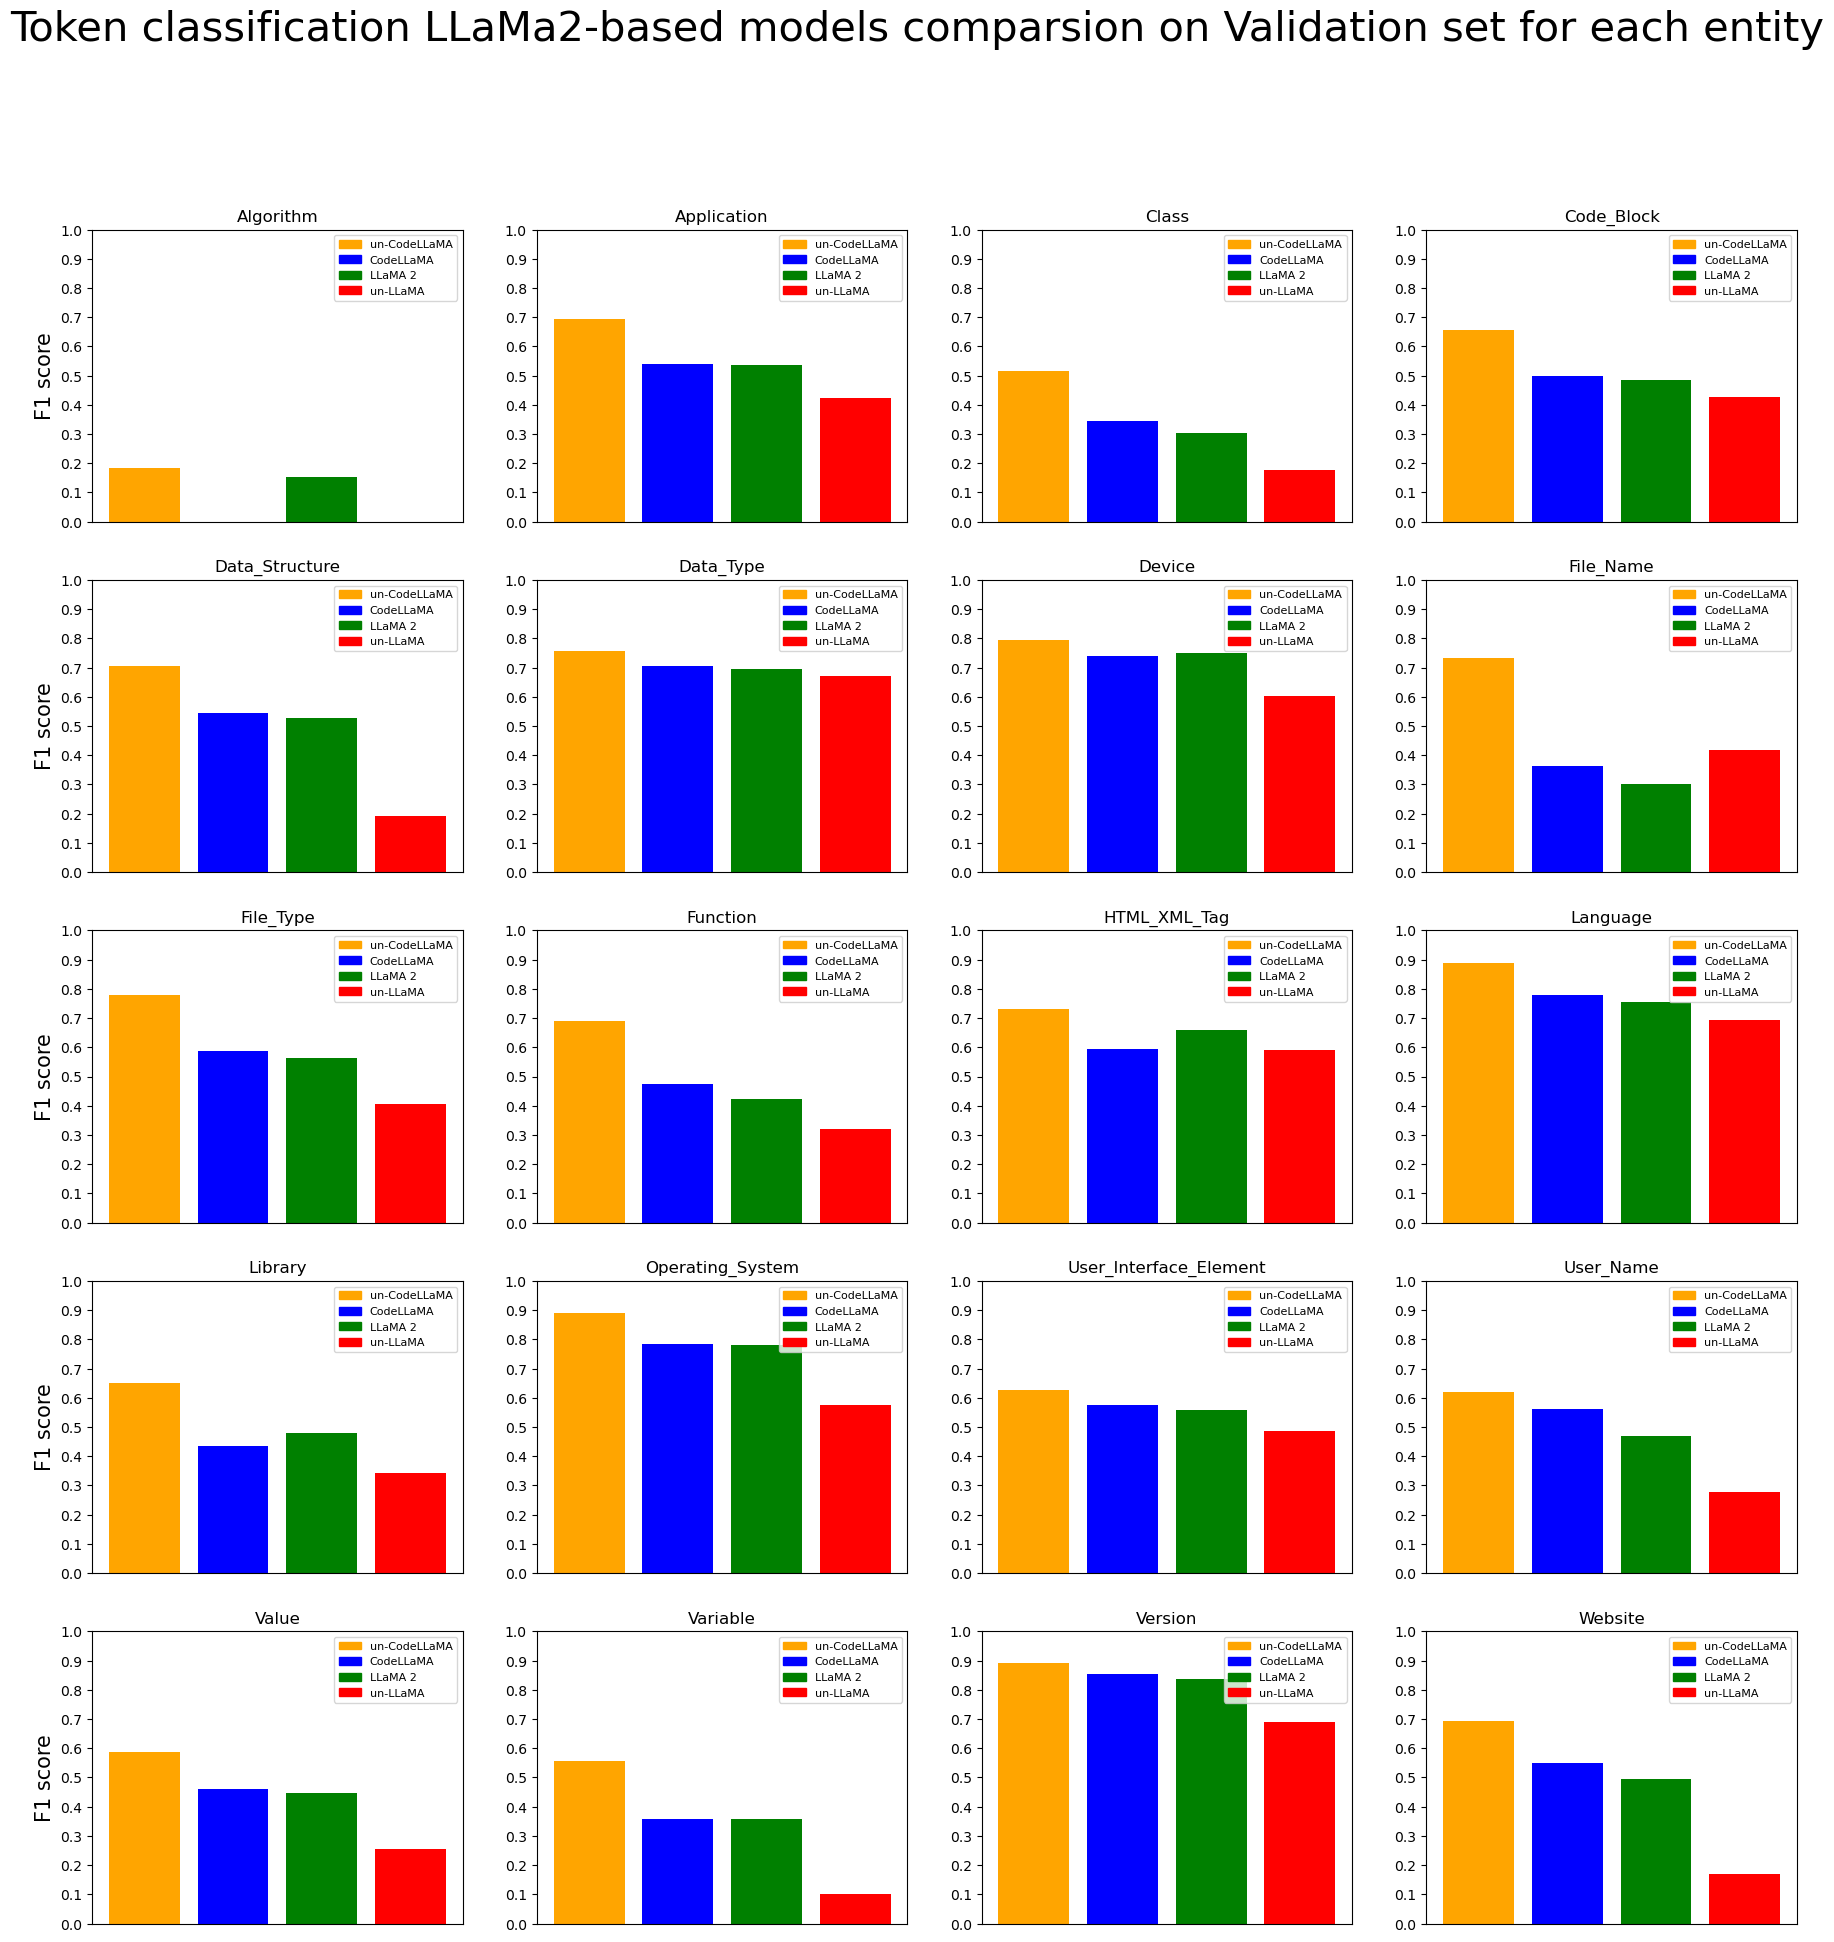

In [123]:
from matplotlib import pyplot as plt

dct_llama = {x: llama_validation[x]["f1"] for x in llama_validation if "overall" not in x}
dct_unllama = {x: unllama_validation[x]["f1"] for x in unllama_validation if "overall" not in x}
dct_codellama = {x: codellama_validation[x]["f1"] for x in codellama_validation if "overall" not in x}
dct_uncodellama = {x: uncodellama_validation[x]["f1"] for x in uncodellama_validation if "overall" not in x}


data = {
    model_uncodellama: list(dct_uncodellama.values()),
    model_codellama: list(dct_codellama.values()),
    model_llama: list(dct_llama.values()),
    model_unllama: list(dct_unllama.values()),
}
length = len(list(dct_uncodellama.values()))
X = [short2long[x] for x in dct_llama.keys()]
colors = ['orange', 'blue', 'green', 'red']

fig, axes = plt.subplots(5, 4, figsize =(22, 22))
ax = axes.ravel()  

total_width=.8
single_width=.9
n_bars = len(data)
bar_width = total_width / n_bars
handles = [plt.Rectangle((0,0),1,1, color=colors[idx]) for idx, label in enumerate(data.keys())]

for i in range(length):
    temp_class = []
    X_axis = np.arange(len(data))
    for j, key in enumerate(data):
        x_offset = (j - n_bars / 2) * bar_width + bar_width / 2
        temp_class.append(data[key][i])
    
    ax[i].bar(X_axis, temp_class, color=colors)
    ax[i].set_title(X[i], fontsize=12)  
    ax[i].set_xticks([])
    ax[i].set_yticks(np.arange(0, 1.1, 0.1))
    if i % 4 == 0:
        ax[i].set_ylabel('F1 score', fontsize = 15) 
    ax[i].legend(handles,data.keys(), loc='best', fontsize=8)


plt.suptitle('Token classification LLaMa2-based models comparsion on Validation set for each entity', fontsize=30)
plt.savefig(path_save_image + 'plot_llama_val.png')
plt.show()

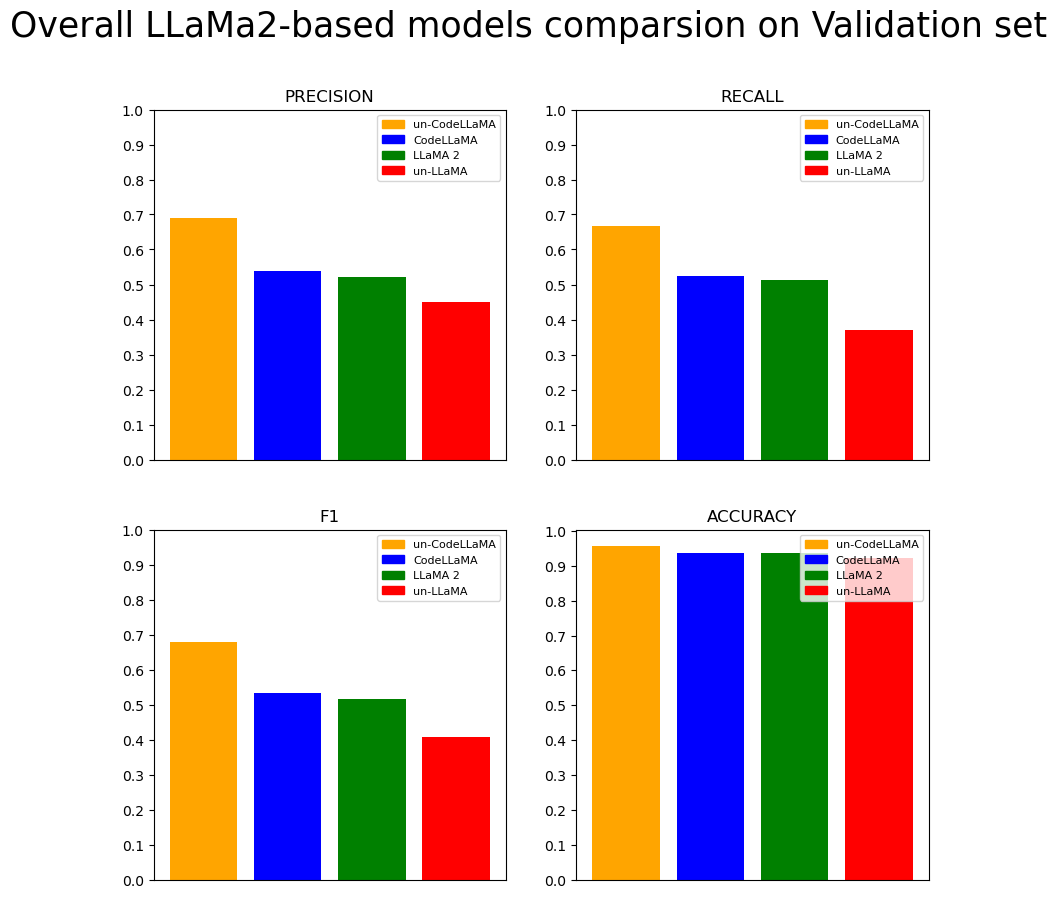

In [126]:
dct_llama = {x: llama_validation[x] for x in llama_validation if "overall"  in x}
dct_unllama = {x: unllama_validation[x] for x in unllama_validation if "overall"  in x}
dct_codellama = {x: codellama_validation[x] for x in codellama_validation if "overall"  in x}
dct_uncodellama = {x: uncodellama_validation[x] for x in uncodellama_validation if "overall"  in x}

data = {
    model_uncodellama: list(dct_uncodellama.values()),
    model_codellama: list(dct_codellama.values()),
    model_llama: list(dct_llama.values()),
    model_unllama: list(dct_unllama.values()),
}
length = len(list(dct_uncodellama.values()))
X = [x.split("_")[1].upper() for x in dct_llama.keys() if "overall" in x]
colors = ['orange', 'blue', 'green', 'red']

fig, axes = plt.subplots(2, 2, figsize =(10, 10))
ax = axes.ravel()  

total_width=.8
single_width=.9
n_bars = len(data)
bar_width = total_width / n_bars
handles = [plt.Rectangle((0,0),1,1, color=colors[idx]) for idx, label in enumerate(data.keys())]

for i in range(length):
    temp_class = []
    X_axis = np.arange(len(data))
    for j, key in enumerate(data):
        x_offset = (j - n_bars / 2) * bar_width + bar_width / 2
        temp_class.append(data[key][i])
    
    ax[i].bar(X_axis, temp_class, color=colors)
    ax[i].set_title(X[i], fontsize=12)  
    ax[i].set_xticks([])
    ax[i].set_yticks(np.arange(0, 1.1, 0.1))
    ax[i].legend(handles,data.keys(), loc='best', fontsize=8)

plt.suptitle('Overall LLaMa2-based models comparsion on Validation set', fontsize=25)
plt.savefig(path_save_image + 'plot_llama_val_over.png')
plt.show()

In [127]:
text = \
f"""
F1 scores on VALIDATION set:\n
{model_uncodellama} - {dct_uncodellama['overall_f1']}
{model_codellama} - {dct_codellama['overall_f1']}
{model_llama} - {dct_llama['overall_f1']}
{model_unllama} - {dct_unllama['overall_f1']}
"""

print(text)


F1 scores on VALIDATION set:

un-CodeLLaMA - 0.6791147994467496
CodeLLaMA - 0.5315651333057052
LLaMA 2 - 0.5169433392783647
un-LLaMA - 0.40705319784817684



## Test set

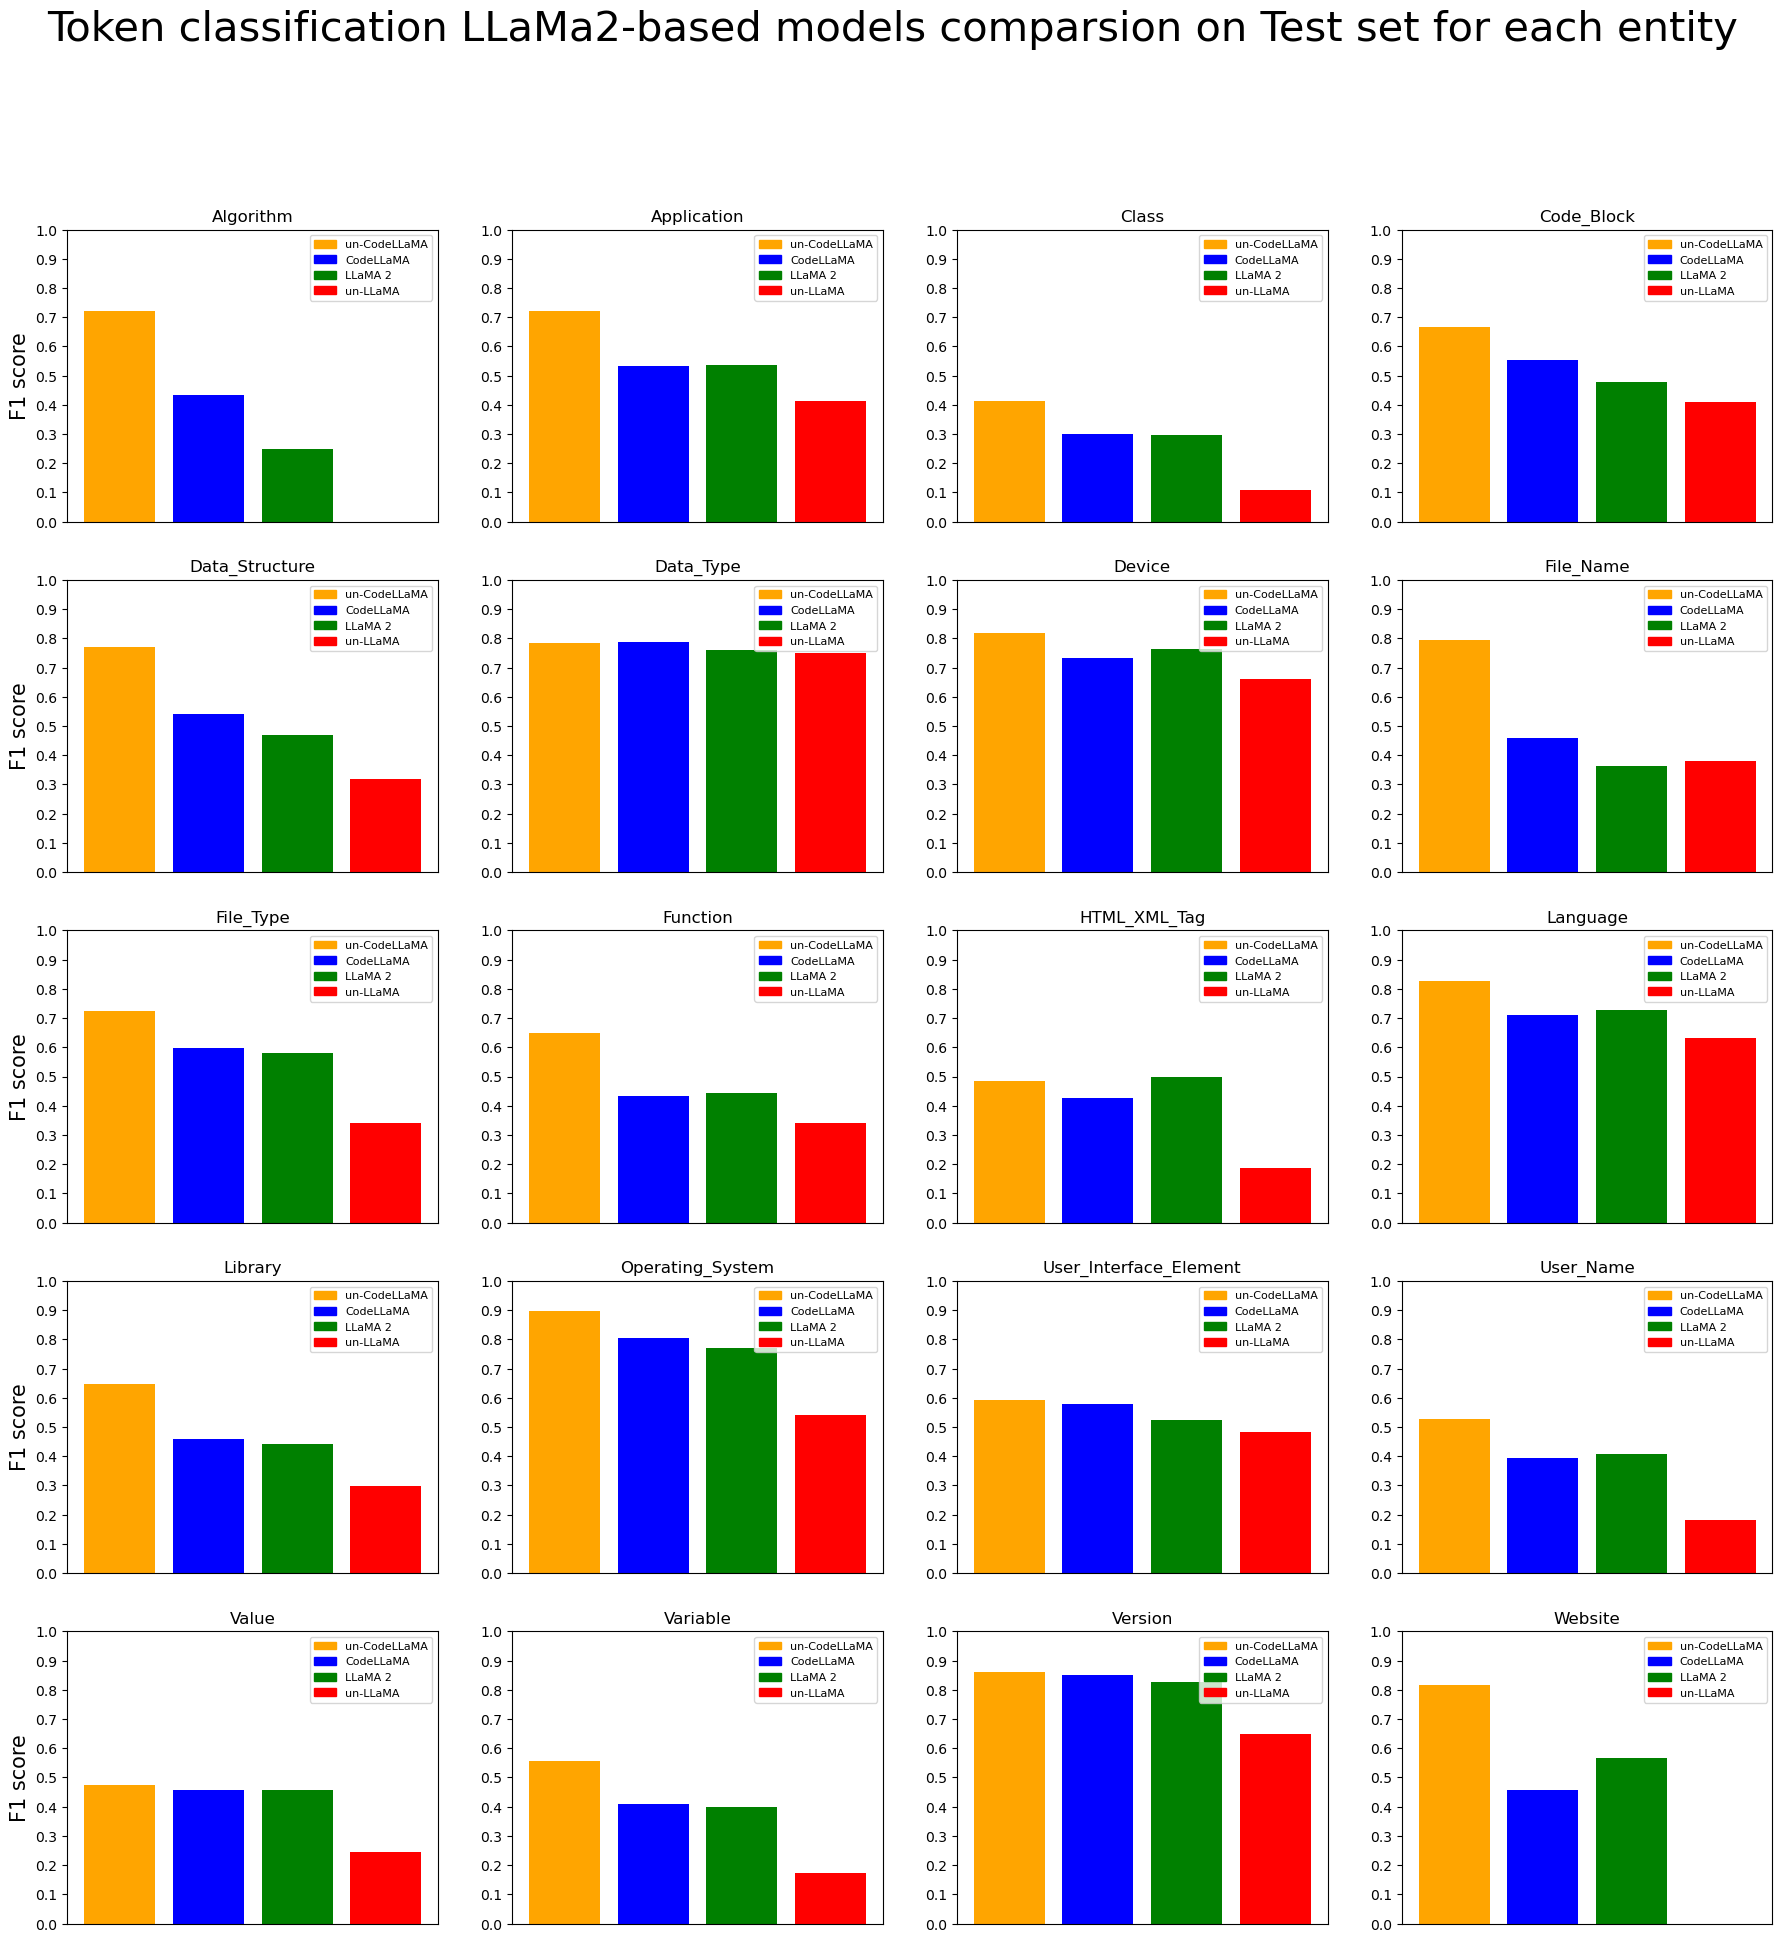

In [129]:
from matplotlib import pyplot as plt

dct_llama = {x: llama_test[x]["f1"] for x in llama_test if "overall" not in x}
dct_unllama = {x: unllama_test[x]["f1"] for x in unllama_test if "overall" not in x}
dct_codellama = {x: codellama_test[x]["f1"] for x in codellama_test if "overall" not in x}
dct_uncodellama = {x: uncodellama_test[x]["f1"] for x in uncodellama_test if "overall" not in x}


data = {
    model_uncodellama: list(dct_uncodellama.values()),
    model_codellama: list(dct_codellama.values()),
    model_llama: list(dct_llama.values()),
    model_unllama: list(dct_unllama.values()),
}
length = len(list(dct_uncodellama.values()))
X = [short2long[x] for x in dct_llama.keys()]
colors = ['orange', 'blue', 'green', 'red']

fig, axes = plt.subplots(5, 4, figsize =(22, 22))
ax = axes.ravel()  

total_width=.8
single_width=.9
n_bars = len(data)
bar_width = total_width / n_bars
handles = [plt.Rectangle((0,0),1,1, color=colors[idx]) for idx, label in enumerate(data.keys())]

for i in range(length):
    temp_class = []
    X_axis = np.arange(len(data))
    for j, key in enumerate(data):
        x_offset = (j - n_bars / 2) * bar_width + bar_width / 2
        temp_class.append(data[key][i])
    
    ax[i].bar(X_axis, temp_class, color=colors)
    ax[i].set_title(X[i], fontsize=12)  
    ax[i].set_xticks([])
    ax[i].set_yticks(np.arange(0, 1.1, 0.1))
    if i % 4 == 0:
        ax[i].set_ylabel('F1 score', fontsize = 15) 
    ax[i].legend(handles,data.keys(), loc='best', fontsize=8)


plt.suptitle('Token classification LLaMa2-based models comparsion on Test set for each entity', fontsize=30)
plt.savefig(path_save_image + 'plot_llama_test.png')
plt.show()

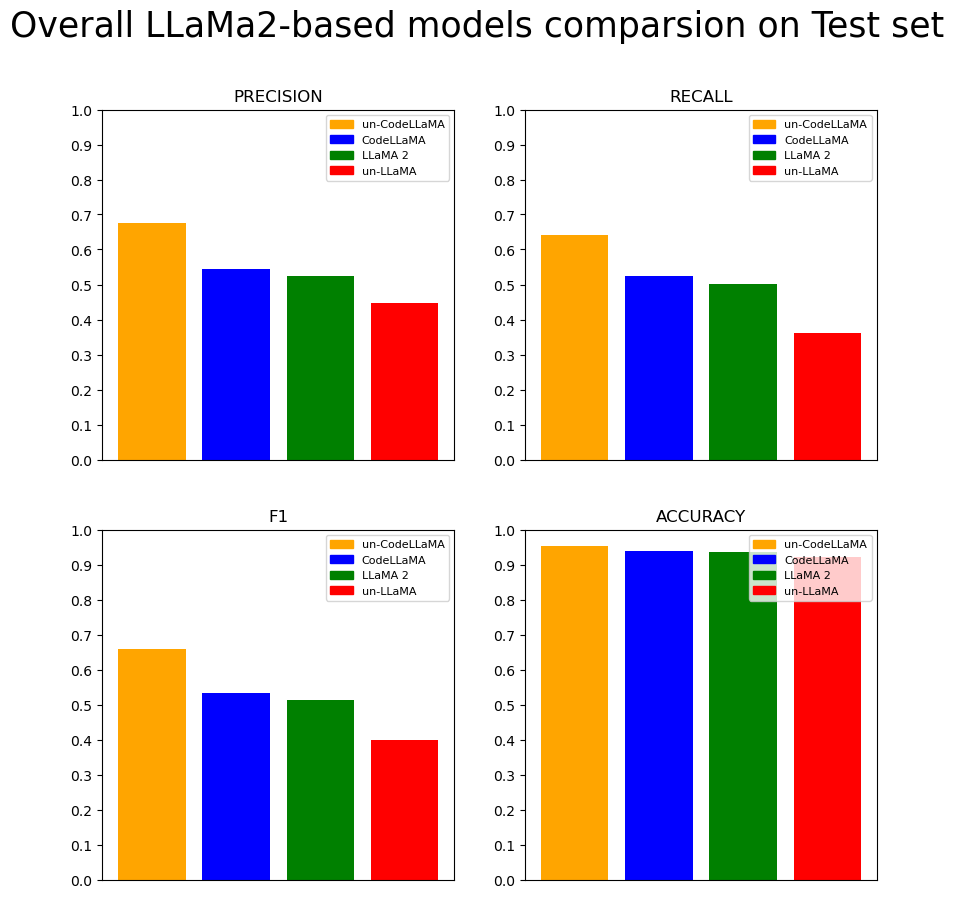

In [132]:
dct_llama = {x: llama_test[x] for x in llama_test if "overall"  in x}
dct_unllama = {x: unllama_test[x] for x in unllama_test if "overall"  in x}
dct_codellama = {x: codellama_test[x] for x in codellama_test if "overall"  in x}
dct_uncodellama = {x: uncodellama_test[x] for x in uncodellama_test if "overall"  in x}

data = {
    model_uncodellama: list(dct_uncodellama.values()),
    model_codellama: list(dct_codellama.values()),
    model_llama: list(dct_llama.values()),
    model_unllama: list(dct_unllama.values()),
}
length = len(list(dct_uncodellama.values()))
X = [x.split("_")[1].upper() for x in dct_llama.keys() if "overall" in x]
colors = ['orange', 'blue', 'green', 'red']

fig, axes = plt.subplots(2, 2, figsize =(10, 10))
ax = axes.ravel()  

total_width=.8
single_width=.9
n_bars = len(data)
bar_width = total_width / n_bars
handles = [plt.Rectangle((0,0),1,1, color=colors[idx]) for idx, label in enumerate(data.keys())]

for i in range(length):
    temp_class = []
    X_axis = np.arange(len(data))
    for j, key in enumerate(data):
        x_offset = (j - n_bars / 2) * bar_width + bar_width / 2
        temp_class.append(data[key][i])
    
    ax[i].bar(X_axis, temp_class, color=colors)
    ax[i].set_title(X[i], fontsize=12)  
    ax[i].set_xticks([])
    ax[i].set_yticks(np.arange(0, 1.1, 0.1))
    ax[i].legend(handles,data.keys(), loc='best', fontsize=8)

plt.suptitle('Overall LLaMa2-based models comparsion on Test set', fontsize=25)
plt.savefig(path_save_image + 'plot_llama_test_over.png')
plt.show()

In [133]:
text = \
f"""
F1 scores on TEST set:\n
{model_uncodellama} - {dct_uncodellama['overall_f1']}
{model_codellama} - {dct_codellama['overall_f1']}
{model_llama} - {dct_llama['overall_f1']}
{model_unllama} - {dct_unllama['overall_f1']}
"""

print(text)


F1 scores on TEST set:

un-CodeLLaMA - 0.6577056161831248
CodeLLaMA - 0.5339831401475237
LLaMA 2 - 0.5121822033898306
un-LLaMA - 0.4



# Domain adaptation

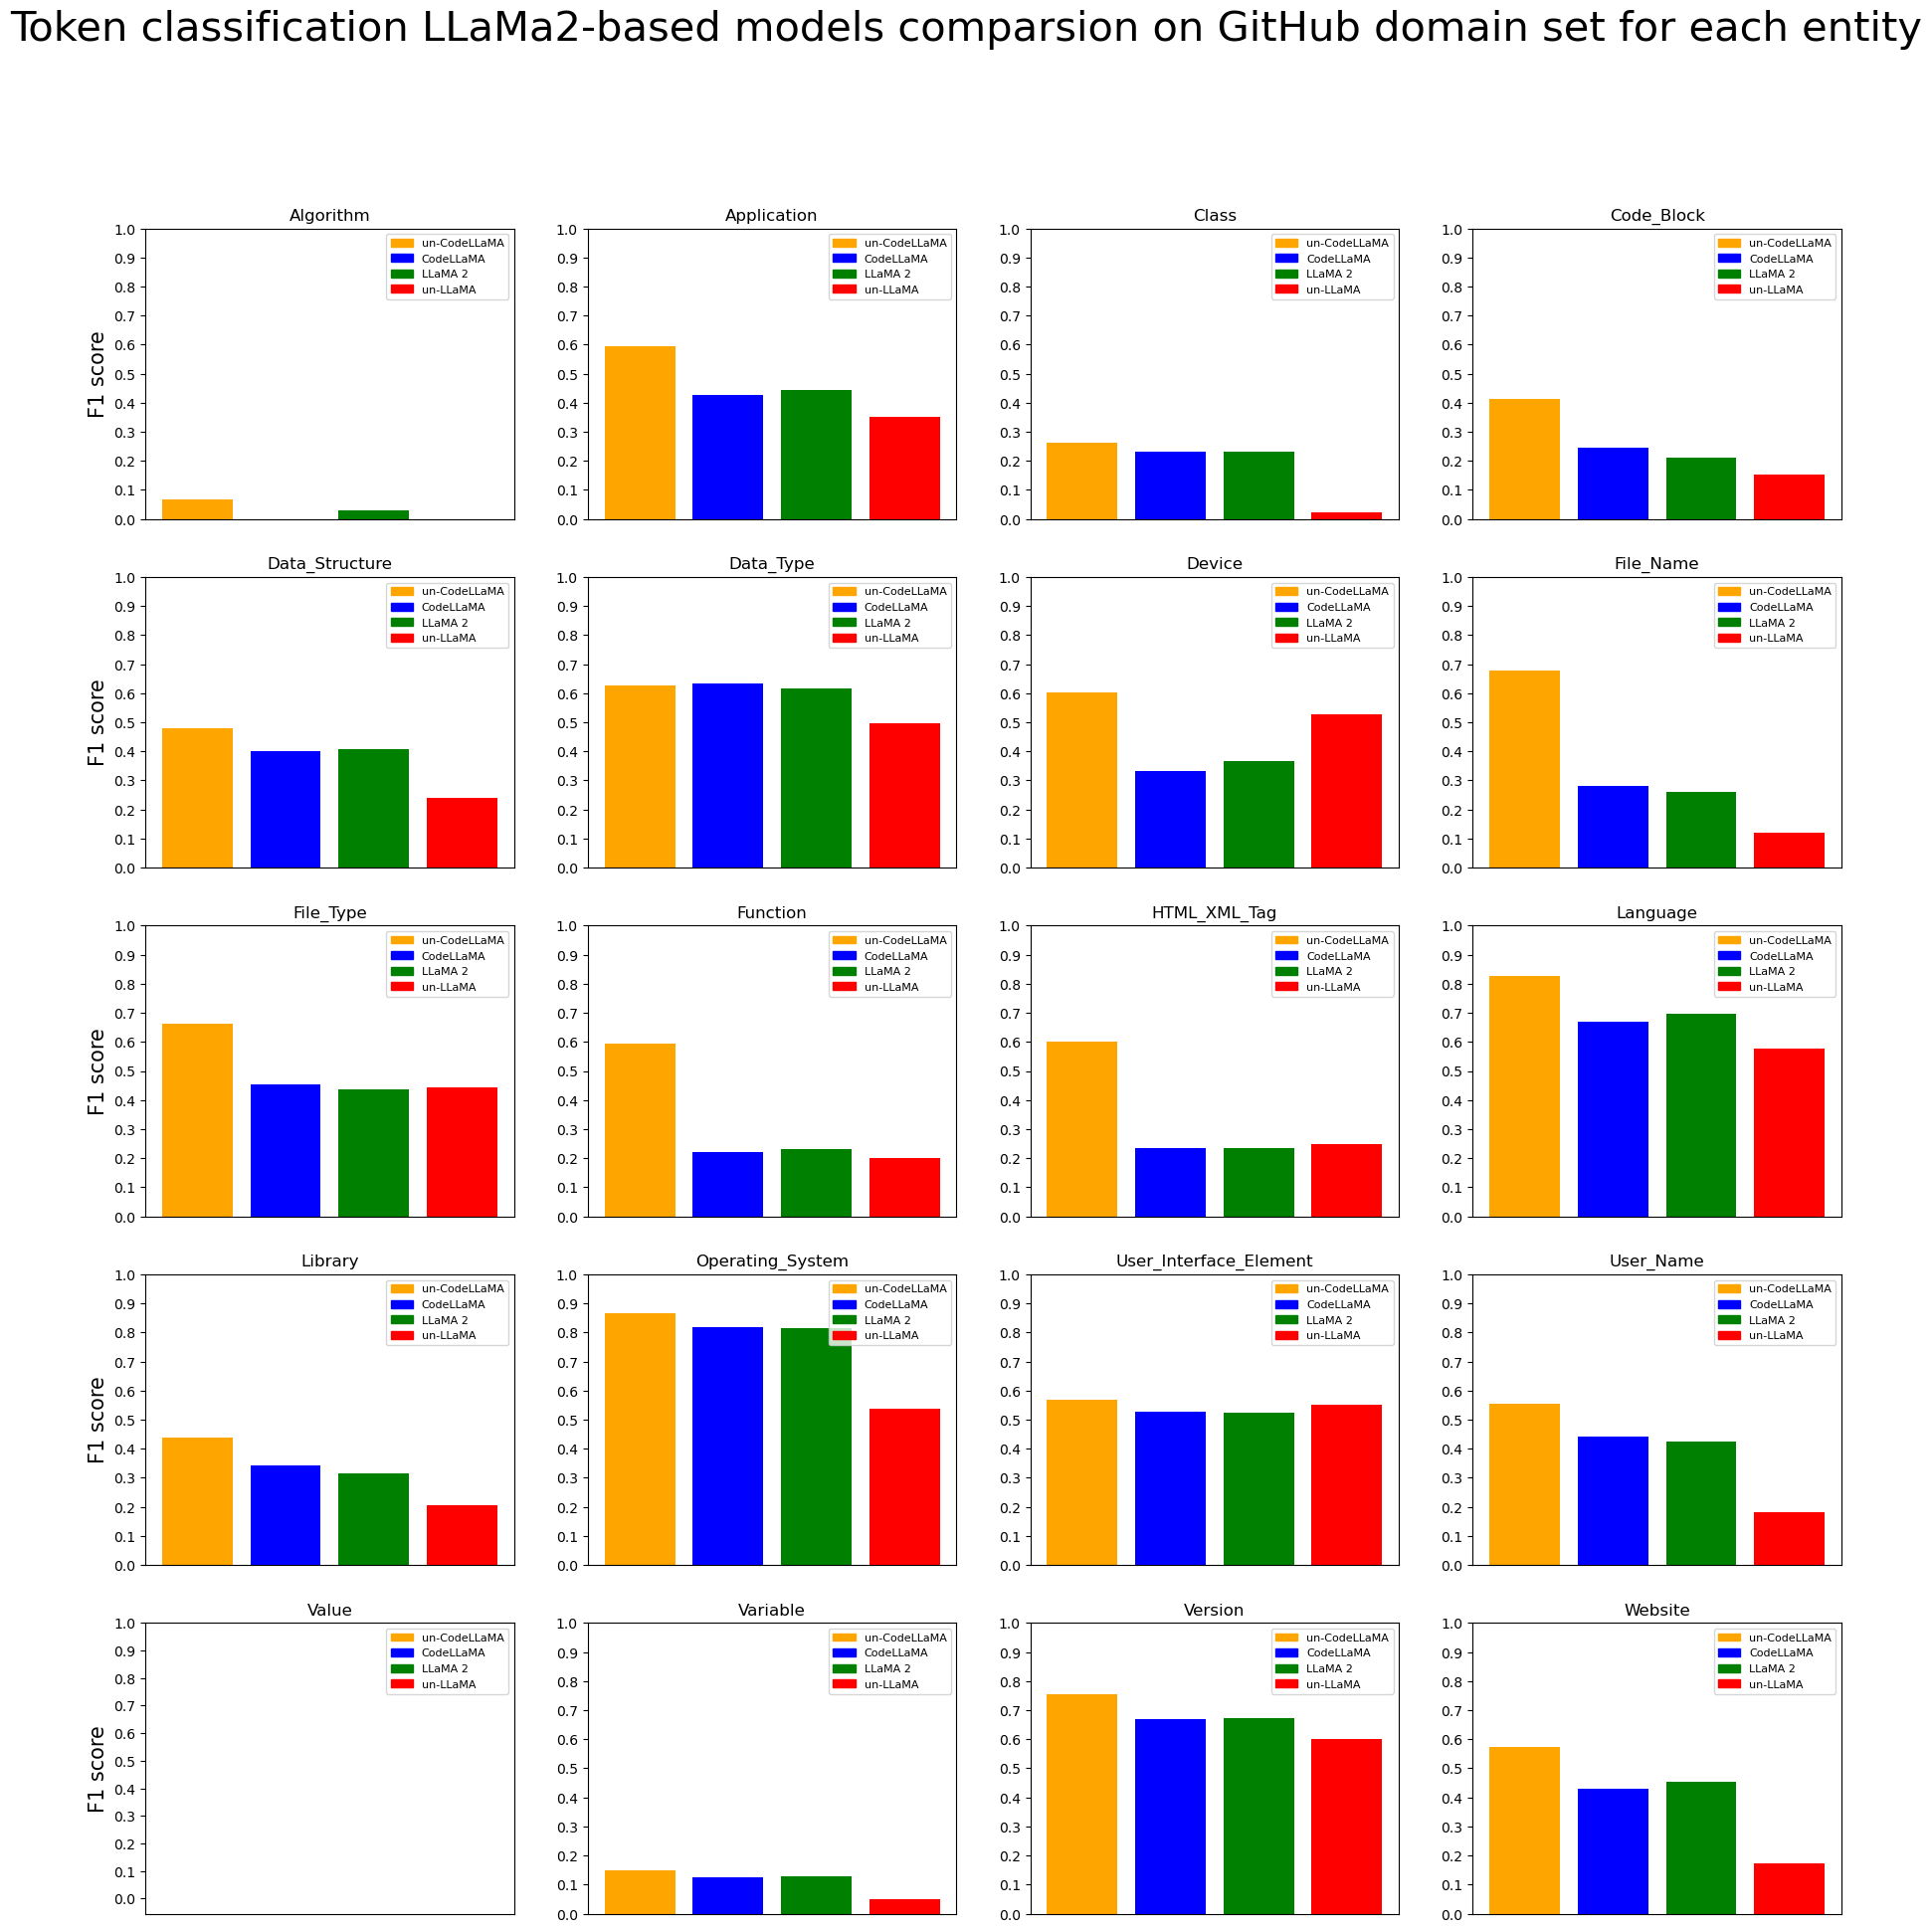

In [134]:
from matplotlib import pyplot as plt

dct_llama = {x: llama_gh[x]["f1"] for x in llama_gh if "overall" not in x}
dct_unllama = {x: unllama_gh[x]["f1"] for x in unllama_gh if "overall" not in x}
dct_codellama = {x: codellama_gh[x]["f1"] for x in codellama_gh if "overall" not in x}
dct_uncodellama = {x: uncodellama_gh[x]["f1"] for x in uncodellama_gh if "overall" not in x}


data = {
    model_uncodellama: list(dct_uncodellama.values()),
    model_codellama: list(dct_codellama.values()),
    model_llama: list(dct_llama.values()),
    model_unllama: list(dct_unllama.values()),
}
length = len(list(dct_uncodellama.values()))
X = [short2long[x] for x in dct_llama.keys()]
colors = ['orange', 'blue', 'green', 'red']

fig, axes = plt.subplots(5, 4, figsize =(22, 22))
ax = axes.ravel()  

total_width=.8
single_width=.9
n_bars = len(data)
bar_width = total_width / n_bars
handles = [plt.Rectangle((0,0),1,1, color=colors[idx]) for idx, label in enumerate(data.keys())]

for i in range(length):
    temp_class = []
    X_axis = np.arange(len(data))
    for j, key in enumerate(data):
        x_offset = (j - n_bars / 2) * bar_width + bar_width / 2
        temp_class.append(data[key][i])
    
    ax[i].bar(X_axis, temp_class, color=colors)
    ax[i].set_title(X[i], fontsize=12)  
    ax[i].set_xticks([])
    ax[i].set_yticks(np.arange(0, 1.1, 0.1))
    if i % 4 == 0:
        ax[i].set_ylabel('F1 score', fontsize = 15) 
    ax[i].legend(handles,data.keys(), loc='best', fontsize=8)


plt.suptitle('Token classification LLaMa2-based models comparsion on GitHub domain set for each entity', fontsize=30)
plt.savefig(path_save_image + 'plot_llama_gh.png')
plt.show()

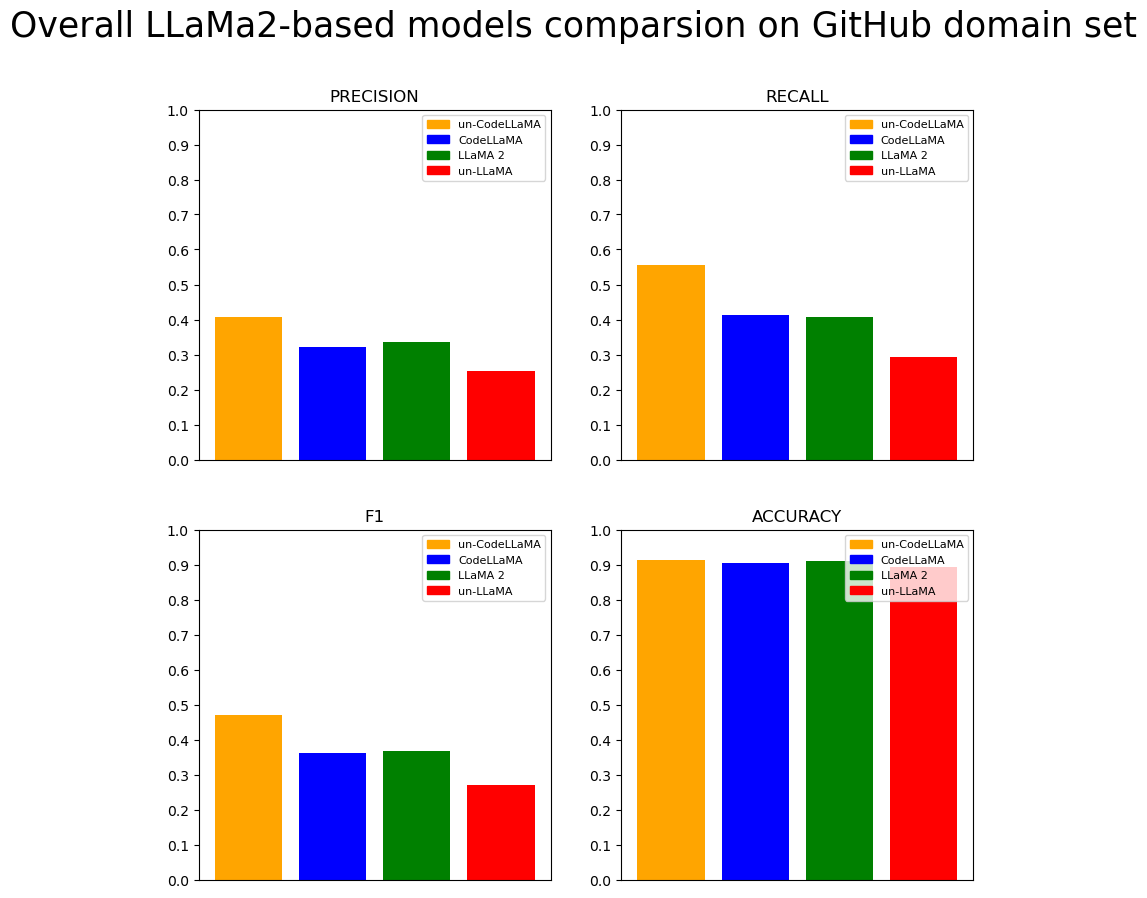

In [135]:
dct_llama = {x: llama_gh[x] for x in llama_gh if "overall"  in x}
dct_unllama = {x: unllama_gh[x] for x in unllama_gh if "overall"  in x}
dct_codellama = {x: codellama_gh[x] for x in codellama_gh if "overall"  in x}
dct_uncodellama = {x: uncodellama_gh[x] for x in uncodellama_gh if "overall"  in x}

data = {
    model_uncodellama: list(dct_uncodellama.values()),
    model_codellama: list(dct_codellama.values()),
    model_llama: list(dct_llama.values()),
    model_unllama: list(dct_unllama.values()),
}
length = len(list(dct_uncodellama.values()))
X = [x.split("_")[1].upper() for x in dct_llama.keys() if "overall" in x]
colors = ['orange', 'blue', 'green', 'red']

fig, axes = plt.subplots(2, 2, figsize =(10, 10))
ax = axes.ravel()  

total_width=.8
single_width=.9
n_bars = len(data)
bar_width = total_width / n_bars
handles = [plt.Rectangle((0,0),1,1, color=colors[idx]) for idx, label in enumerate(data.keys())]

for i in range(length):
    temp_class = []
    X_axis = np.arange(len(data))
    for j, key in enumerate(data):
        x_offset = (j - n_bars / 2) * bar_width + bar_width / 2
        temp_class.append(data[key][i])
    
    ax[i].bar(X_axis, temp_class, color=colors)
    ax[i].set_title(X[i], fontsize=12)  
    ax[i].set_xticks([])
    ax[i].set_yticks(np.arange(0, 1.1, 0.1))
    ax[i].legend(handles,data.keys(), loc='best', fontsize=8)

plt.suptitle('Overall LLaMa2-based models comparsion on GitHub domain set', fontsize=25)
plt.savefig(path_save_image + 'plot_llama_gh_over.png')
plt.show()

In [136]:
text = \
f"""
F1 scores on GITHUB DOMAIN set:\n
{model_uncodellama} - {dct_uncodellama['overall_f1']}
{model_codellama} - {dct_codellama['overall_f1']}
{model_llama} - {dct_llama['overall_f1']}
{model_unllama} - {dct_unllama['overall_f1']}
"""

print(text)


F1 scores on GITHUB DOMAIN set:

un-CodeLLaMA - 0.4711546176682982
CodeLLaMA - 0.362202109109026
LLaMA 2 - 0.36713406292749656
un-LLaMA - 0.27140719880313297

